                                             Assignment 03
                                        190626H -- Tharundi P.D.

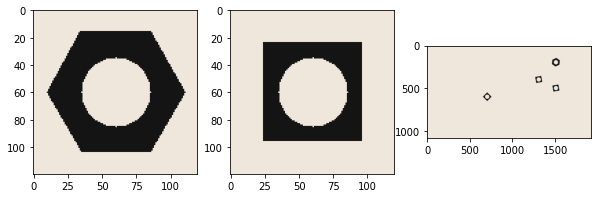

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

hexnut_template = cv.imread('hexnut_template.png', cv.IMREAD_COLOR)
squarenut_template =  cv.imread('squarenut_template.png', cv.IMREAD_COLOR)
conveyor_f100 =  cv.imread('conveyor_f100.png', cv.IMREAD_COLOR)

fig, ax = plt. subplots(1,3,figsize = (10,10))
ax[0].imshow(cv.cvtColor(hexnut_template, cv.COLOR_RGB2BGR))
ax[1].imshow(cv.cvtColor(squarenut_template, cv.COLOR_RGB2BGR))
ax[2].imshow(cv.cvtColor(conveyor_f100, cv.COLOR_RGB2BGR))
plt.show()

Converting the images to grayscale and apply Otsu's thresholding to obtain the binarized image.

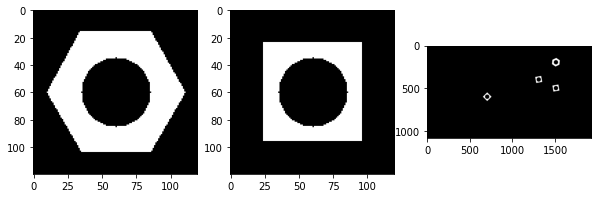

In [2]:
hexnut_template_gray = cv.cvtColor(hexnut_template, cv.COLOR_BGR2GRAY)
squarenut_template_gray = cv.cvtColor(squarenut_template, cv.COLOR_BGR2GRAY)
conveyor_f100_gray = cv.cvtColor(conveyor_f100, cv.COLOR_BGR2GRAY)

ret1, th1 =  cv.threshold(hexnut_template_gray,0,255,cv.THRESH_BINARY_INV+cv.THRESH_OTSU)
ret2, th2 =  cv.threshold(squarenut_template_gray,0,255,cv.THRESH_BINARY_INV+cv.THRESH_OTSU)
ret3, th3 =  cv.threshold(conveyor_f100_gray,0,255,cv.THRESH_BINARY_INV+cv.THRESH_OTSU)

fig, ax = plt. subplots(1,3, figsize = (10,10))
ax[0].imshow(th1, cmap = 'gray')
ax[1].imshow(th2, cmap = 'gray')
ax[2].imshow(th3, cmap = 'gray')
plt.show()

Carrying out morphological closing to remove small holes inside the foreground.

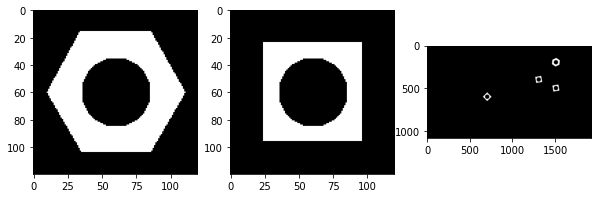

In [3]:
kernel = np.ones((3,3),np.uint8)

closing1 = cv.morphologyEx(th1, cv.MORPH_CLOSE, kernel)
closing2 = cv.morphologyEx(th2, cv.MORPH_CLOSE, kernel)
closing3 = cv.morphologyEx(th3, cv.MORPH_CLOSE, kernel)

fig, ax = plt. subplots(1,3, figsize =(10,10))
ax[0].imshow(closing1, cmap = 'gray')
ax[1].imshow(closing2, cmap = 'gray')
ax[2].imshow(closing3, cmap = 'gray')
plt.show()

Connected components analysis

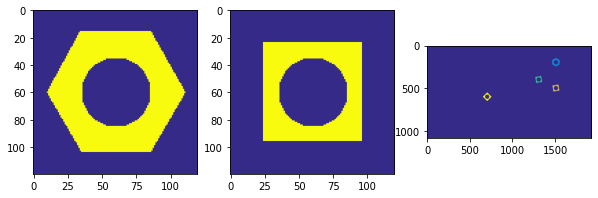

In [4]:
image1, labels1, stats1, centroids1 = cv.connectedComponentsWithStats(closing1)
image2, labels2, stats2, centroids2 = cv.connectedComponentsWithStats(closing2)
image3, labels3, stats3, centroids3 = cv.connectedComponentsWithStats(closing3)

hexnut_template_colored = cv.applyColorMap((labels1/np.amax(labels1)*255).astype('uint8'), cv.COLORMAP_PARULA)
squarenut_template_colored = cv.applyColorMap((labels2/np.amax(labels2)*255).astype('uint8'), cv.COLORMAP_PARULA)
conveyor_f100_colored = cv.applyColorMap((labels3/np.amax(labels3)*255).astype('uint8'), cv.COLORMAP_PARULA)

fig, ax = plt. subplots(1,3, figsize =(10,10))
ax[0].imshow(cv.cvtColor(hexnut_template_colored, cv.COLOR_BGR2RGB))
ax[1].imshow(cv.cvtColor(squarenut_template_colored, cv.COLOR_BGR2RGB))
ax[2].imshow(cv.cvtColor(conveyor_f100_colored, cv.COLOR_BGR2RGB))
plt.show()

Contour Analysis

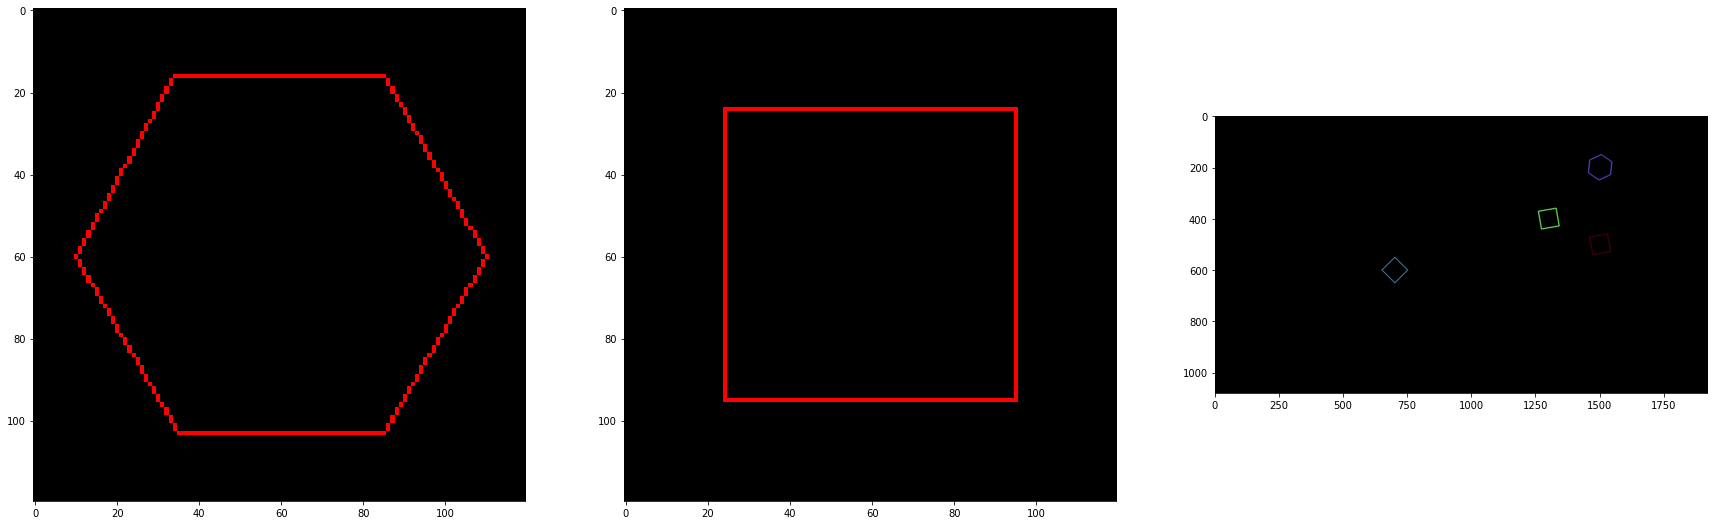

Number of Hexagonal nuts in the image :  1
Number of Squre nuts in the image :  3


In [5]:
contours1, hierarchy1 = cv.findContours(closing1, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
hexnut_template_contour = contours1[0]

contours2, hierarchy2 = cv.findContours(closing2, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
squarenut_template_contour = contours2[0]

contours3, hierarchy3 = cv.findContours(closing3, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

new_hex = np.zeros(hexnut_template.shape, dtype=np.uint8)
cv.drawContours(new_hex, contours1, -1, (0, 0, 255))  
new_squ = np.zeros(squarenut_template.shape, dtype=np.uint8)
cv.drawContours(new_squ, contours2, -1, (0, 0, 255)) 
new_conveyor = np.zeros(conveyor_f100.shape, dtype=np.uint8)

import random as rng
for i in range(len(contours3)):
        color = (rng.randint(0,256), rng.randint(0,256), rng.randint(0,256))
        cv.drawContours(new_conveyor, contours3, i, color, 3)

fig, ax = plt. subplots(1,3, figsize = (30,30))
ax[0].imshow(cv.cvtColor(new_hex, cv.COLOR_BGR2RGB))
ax[1].imshow(cv.cvtColor(new_squ, cv.COLOR_BGR2RGB))
ax[2].imshow(cv.cvtColor(new_conveyor, cv.COLOR_BGR2RGB))
plt.show()

count1 = 0
count2 = 0
for t in contours3:
    r1 = cv.matchShapes(t,squarenut_template_contour,1,0.0)
    r2 = cv.matchShapes(t,hexnut_template_contour,1,0.0)
    if (r1 < 0.005): 
        count1 += 1
    if (r2 < 0.005):
        count2 +=1
        
print("Number of Hexagonal nuts in the image : ", count2)
print("Number of Squre nuts in the image : ", count1)

Detecting Objects on a Synthetic Conveyor

In [2]:
cv.namedWindow('Conveyor', cv.WINDOW_NORMAL)
cap = cv.VideoCapture('conveyor.mp4')
f = 0
frame = []      
while cap.isOpened():                                    
    ret, frame = cap.read()
    if not ret:
        print("Can't receive frame (stream end?). Exiting.")
        break
    #frame.append(frame.copy())

    f += 1
    text = 'Frame:' + str(f)
    cv.putText(frame,text , (100, 100), cv.FONT_HERSHEY_COMPLEX, 1, (0,250,0), 1, cv.LINE_AA)
    cv.imshow('Conveyor', frame)

    if cv.waitKey(1) == ord('q'):  
        break

cap.release()
cv.destroyAllWindows()

Can't receive frame (stream end?). Exiting.


In [3]:
frame_array = []
shape = (1080, 1920, 3)

for fr in frame[:]:
    fr = cv.cvtColor(fr, cv.COLOR_BGR2GRAY)                                  
    ret, thresh = cv.threshold(fr, 127, 255,0)                              
    contours,hierarchy = cv.findContours(thresh,2,1)                          
    square_count = 0
    Hex_count = 0
    for con in contours:
        area = cv.contourArea(con)
        if (6715< area <6815):
                Hex_count+=1
        if (5150< area <5250):
                square_count+=1
        
    img = fr.copy()
    cv.putText(img,"Hexaganol:" + str(Hex_count) , (100, 130), cv.FONT_HERSHEY_SIMPLEX, 1, (0,0,0), 2, cv.LINE_AA)
    cv.putText(img,"square:" + str(square_count) , (100, 100), cv.FONT_HERSHEY_SIMPLEX, 1, (0,0,0), 2, cv.LINE_AA)
    frame_array.append(img)

out = cv.VideoWriter('./conveyor_result_indexno.mp4',cv.VideoWriter_fourcc(*'h264'), 30, (shape[1], shape[0]))
 
for i in range(len(frame_array)):
    cv.imshow('Frame', frame_array[i])
    if cv.waitKey(1) == ord('q'):
        break
    out.write(frame_array[i])

out.release()
cv.destroyAllWindows()


TypeError: 'NoneType' object is not subscriptable